## Matt Harrison - Idiomatic Pandas | SciPy 2023
https://www.youtube.com/watch?v=w-p0hLNC-JQ&t=3644s



**Outline**

1. Load Data
2. Types
3. Chaining
4. Mutation
5. Apply
6. Aggregation

In [1]:
import numpy as np
import pandas as pd
import pyarrow

In [2]:
pd.__version__

'2.1.4'

In [3]:
pyarrow.__version__

'15.0.2'

**1. Data**


In [4]:
raw = pd.read_feather('honest.fth', dtype_backend='pyarrow') #Feather is a portable file format for storing Arrow tables or data frames

In [5]:
raw.head(5)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
0,1972.0,1.0,23.0,<NA>,205.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,1972.0,2.0,70.0,<NA>,441.0,<NA>,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,1972.0,3.0,48.0,<NA>,270.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,1972.0,4.0,27.0,<NA>,1.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
4,1972.0,5.0,61.0,<NA>,385.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>


In [6]:
raw.shape

(64814, 13)

Cleaning

In [7]:
#Listo columnas
cols=['YEAR','ID','AGE', 'HRS1','OCC','MAJOR1','SEX','RACE','BORN','INCOME','INCOME06','HONEST','TICKET']
raw[cols]

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
0,1972.0,1.0,23.0,<NA>,205.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,1972.0,2.0,70.0,<NA>,441.0,<NA>,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,1972.0,3.0,48.0,<NA>,270.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,1972.0,4.0,27.0,<NA>,1.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
4,1972.0,5.0,61.0,<NA>,385.0,<NA>,2.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018.0,2344.0,37.0,36.0,<NA>,<NA>,2.0,1.0,1.0,<NA>,<NA>,<NA>,<NA>
64810,2018.0,2345.0,75.0,36.0,<NA>,<NA>,2.0,1.0,1.0,12.0,<NA>,<NA>,<NA>
64811,2018.0,2346.0,67.0,<NA>,<NA>,<NA>,2.0,1.0,1.0,12.0,<NA>,<NA>,<NA>
64812,2018.0,2347.0,72.0,<NA>,<NA>,<NA>,1.0,1.0,1.0,12.0,<NA>,<NA>,<NA>


In [8]:
#% de celdas na
raw[cols].isna().mean()*100

YEAR         0.000000
ID           0.000000
AGE          0.351776
HRS1        42.132873
OCC         62.426328
MAJOR1      94.410158
SEX          0.000000
RACE         0.000000
BORN        14.291665
INCOME      12.845990
INCOME06    82.219891
HONEST      87.565958
TICKET      80.650785
dtype: float64

In [9]:
# En formato 
(
    raw
    [cols]
    .isna()
    .mean()*100
)

YEAR         0.000000
ID           0.000000
AGE          0.351776
HRS1        42.132873
OCC         62.426328
MAJOR1      94.410158
SEX          0.000000
RACE         0.000000
BORN        14.291665
INCOME      12.845990
INCOME06    82.219891
HONEST      87.565958
TICKET      80.650785
dtype: float64

In [10]:
raw.MAJOR1.value_counts()

MAJOR1
9.0     542
16.0    340
18.0    197
36.0    186
55.0    127
       ... 
69.0      4
75.0      3
76.0      3
64.0      3
4.0       3
Name: count, Length: 80, dtype: int64[pyarrow]

In [11]:
# Matt detalla 
MAJOR= '''RESPONSE PUNCH 1972-82 1982B 1983-87 1987B 1988-91 1993-98 2000-04 2006 2008 2010 2012 2014 2016 2018 ALL
Accounting/bookkeeping 1 0 0 0 0 0 0 0 0 0 0 28 32 30 29 119
Advertising 2 0 0 0 0 0 0 0 0 0 0 3 2 0 0 5
Agriculture/horticulture 3 0 0 0 0 0 0 0 0 0 0 8 2 7 5 22
Allied health 4 0 0 0 0 0 0 0 0 0 0 0 2 1 0 3
Anthropology 5 0 0 0 0 0 0 0 0 0 0 3 5 1 1 10
Architecture 6 0 0 0 0 0 0 0 0 0 0 2 3 5 3 13
Art 7 0 0 0 0 0 0 0 0 0 0 6 7 11 10 34
Biology 8 0 0 0 0 0 0 0 0 0 0 16 22 33 26 97
Business administration 9 0 0 0 0 0 0 0 0 0 0 90 142 172 138 542
Chemistry 11 0 0 0 0 0 0 0 0 0 0 5 8 10 4 27
Communications/speech 12 0 0 0 0 0 0 0 0 0 0 20 18 26 18 82
Comm. disorders 13 0 0 0 0 0 0 0 0 0 0 4 6 2 2 14
Computer science 14 0 0 0 0 0 0 0 0 0 0 25 24 33 17 99
Dentistry 15 0 0 0 0 0 0 0 0 0 0 2 4 3 5 14
Education 16 0 0 0 0 0 0 0 0 0 0 73 91 97 79 340
Economics 17 0 0 0 0 0 0 0 0 0 0 11 19 13 19 62
Engineering 18 0 0 0 0 0 0 0 0 0 0 47 49 47 54 197
English 19 0 0 0 0 0 0 0 0 0 0 23 26 27 24 100
Finance 20 0 0 0 0 0 0 0 0 0 0 7 15 14 16 52
Foreign language 21 0 0 0 0 0 0 0 0 0 0 4 8 6 5 23
Forestry 22 0 0 0 0 0 0 0 0 0 0 1 0 3 0 4
Geography 23 0 0 0 0 0 0 0 0 0 0 0 2 2 4 8
Geology 24 0 0 0 0 0 0 0 0 0 0 1 3 4 2 10
History 25 0 0 0 0 0 0 0 0 0 0 10 19 14 19 62
Home economics 26 0 0 0 0 0 0 0 0 0 0 0 0 3 2 5
Industry & techn 27 0 0 0 0 0 0 0 0 0 0 3 4 6 0 13
Journalism 28 0 0 0 0 0 0 0 0 0 0 5 6 6 4 21
Law 29 0 0 0 0 0 0 0 0 0 0 13 18 23 14 68
Law enforcement 30 0 0 0 0 0 0 0 0 0 0 3 5 4 2 14
Library science 31 0 0 0 0 0 0 0 0 0 0 4 5 2 3 14
Marketing 32 0 0 0 0 0 0 0 0 0 0 11 15 13 12 51
Mathematics 33 0 0 0 0 0 0 0 0 0 0 5 10 12 5 32
Medicine 34 0 0 0 0 0 0 0 0 0 0 9 25 12 11 57
Music 35 0 0 0 0 0 0 0 0 0 0 4 2 10 2 18
Nursing 36 0 0 0 0 0 0 0 0 0 0 36 39 60 51 186
Optometry 37 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Pharmacy 38 0 0 0 0 0 0 0 0 0 0 2 5 4 4 15
Philosophy 39 0 0 0 0 0 0 0 0 0 0 2 0 2 2 6
Physical education 40 0 0 0 0 0 0 0 0 0 0 9 6 16 6 37
Physics 41 0 0 0 0 0 0 0 0 0 0 3 6 7 4 20
Psychology 42 0 0 0 0 0 0 0 0 0 0 32 32 34 29 127
Political science/international relations 43 0 0 0 0 0 0 0 0 0 0 16 22 19 14 71
Sociology 44 0 0 0 0 0 0 0 0 0 0 9 15 10 12 46
Special education 45 0 0 0 0 0 0 0 0 0 0 5 3 5 2 15
Theater arts 46 0 0 0 0 0 0 0 0 0 0 6 2 3 1 12
Theology 47 0 0 0 0 0 0 0 0 0 0 6 6 13 8 33
Veterinary medicine 48 0 0 0 0 0 0 0 0 0 0 1 5 3 4 13
Liberal arts 49 0 0 0 0 0 0 0 0 0 0 8 16 12 10 46
Other 50 0 0 0 0 0 0 0 0 0 0 8 10 21 27 66
General sciences 51 0 0 0 0 0 0 0 0 0 0 10 13 15 14 52
Social work 52 0 0 0 0 0 0 0 0 0 0 7 17 24 7 55
General studies 53 0 0 0 0 0 0 0 0 0 0 2 5 7 7 21
Other vocational 54 0 0 0 0 0 0 0 0 0 0 5 11 6 5 27
Health 55 0 0 0 0 0 0 0 0 0 0 23 31 31 42 127
Industrial Relations 56 0 0 0 0 0 0 0 0 0 0 1 0 0 3 4
Child/Human/Family Development 57 0 0 0 0 0 0 0 0 0 0 11 3 7 7 28
Food Science/Nutrition/Culinary Arts 58 0 0 0 0 0 0 0 0 0 0 3 6 9 9 27
Environmental Science/Ecology 59 0 0 0 0 0 0 0 0 0 0 5 5 6 8 24
Social Sciences 60 0 0 0 0 0 0 0 0 0 0 4 2 7 5 18
Human Services/Human Resources 61 0 0 0 0 0 0 0 0 0 0 3 7 7 5 22
Visual Arts/Graphic Design/Design and Drafting 62 0 0 0 0 0 0 0 0 0 0 3 8 9 10 30
Fine Arts 63 0 0 0 0 0 0 0 0 0 0 4 5 5 6 20
Humanities 64 0 0 0 0 0 0 0 0 0 0 0 2 0 1 3
Ethnic studies 65 0 0 0 0 0 0 0 0 0 0 3 1 0 0 4
Educational administration 66 0 0 0 0 0 0 0 0 0 0 3 4 8 9 24
Television/Film 67 0 0 0 0 0 0 0 0 0 0 0 2 6 1 9
Aviation/Aeronatics 68 0 0 0 0 0 0 0 0 0 0 2 1 1 3 7
Statistics/Biostatistics 69 0 0 0 0 0 0 0 0 0 0 0 0 2 2 4
Criminology/Criminal Justice 70 0 0 0 0 0 0 0 0 0 0 13 17 17 13 60
Administrative Science/Public Administration 71 0 0 0 0 0 0 0 0 0 0 2 11 3 5 21
Electronics 72 0 0 0 0 0 0 0 0 0 0 6 6 5 9 26
Urban and Regional Planning 73 0 0 0 0 0 0 0 0 0 0 1 1 3 2 7
Mechanics/Machine Trade 74 0 0 0 0 0 0 0 0 0 0 0 1 1 4 6
Dance 75 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Gerontology 76 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Public Relations 77 0 0 0 0 0 0 0 0 0 0 3 1 2 1 7
Textiles/Cloth 78 0 0 0 0 0 0 0 0 0 0 3 4 0 0 7
Parks and Recreation 79 0 0 0 0 0 0 0 0 0 0 1 2 1 0 4
Information Technology 80 0 0 0 0 0 0 0 0 0 0 0 5 8 11 24
Fashion 81 0 0 0 0 0 0 0 0 0 0 0 0 3 1 4
Counseling 82 0 0 0 0 0 0 0 0 0 0 0 0 11 9 20
Don't know/UNCODED 98 0 0 0 0 0 0 0 0 0 0 2 3 0 0 5
No answer 99 0 0 0 0 0 0 0 0 0 0 0 1 5 3 9
Not applicable 0 13626 354 7542 353 5907 10334 8394 4510 2023 2044 1263 1597 1795 1435 61177'''

# copy paste slight tweak from page 186
major_dict = {int(row.split()[-16]): ' '.join(row.split()[:-16])  for row in MAJOR.split('\n')[1:]}
major_dict

{1: 'Accounting/bookkeeping',
 2: 'Advertising',
 3: 'Agriculture/horticulture',
 4: 'Allied health',
 5: 'Anthropology',
 6: 'Architecture',
 7: 'Art',
 8: 'Biology',
 9: 'Business administration',
 11: 'Chemistry',
 12: 'Communications/speech',
 13: 'Comm. disorders',
 14: 'Computer science',
 15: 'Dentistry',
 16: 'Education',
 17: 'Economics',
 18: 'Engineering',
 19: 'English',
 20: 'Finance',
 21: 'Foreign language',
 22: 'Forestry',
 23: 'Geography',
 24: 'Geology',
 25: 'History',
 26: 'Home economics',
 27: 'Industry & techn',
 28: 'Journalism',
 29: 'Law',
 30: 'Law enforcement',
 31: 'Library science',
 32: 'Marketing',
 33: 'Mathematics',
 34: 'Medicine',
 35: 'Music',
 36: 'Nursing',
 37: 'Optometry',
 38: 'Pharmacy',
 39: 'Philosophy',
 40: 'Physical education',
 41: 'Physics',
 42: 'Psychology',
 43: 'Political science/international relations',
 44: 'Sociology',
 45: 'Special education',
 46: 'Theater arts',
 47: 'Theology',
 48: 'Veterinary medicine',
 49: 'Liberal arts

In [12]:
#Matt crea el codigo para grabarlo en csv
(raw
 [cols]
 .assign(
     MAJOR1=raw.MAJOR1.fillna(99).astype('int').replace(major_dict),
     SEX=raw.SEX#
           
           .astype(int)
           .replace({1:'Male', 2:'Female'}),
     RACE=raw.RACE.astype(int).replace({1:'White', 2:'Black', 3:'Other'}),
     OCC=raw.OCC.fillna(9999).astype(int),
     BORN=raw.BORN.fillna(4).astype(int).replace({1:'Yes', 2:'No', 3:'Don\'t Know',
                                                    4:'No answer', 5:'Not applicable'}),
     INCOME=raw.INCOME.fillna(99).astype(int).replace({99:'No answer', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,15000,20000,25000,]))}),
     INCOME06=raw.INCOME06.fillna(26).astype(int).replace({26:'Refused', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,12500,15000,
                                                                                  17500,20000,22500,25000,30_000,
                                                                                  35_000, 40_000, 50_000, 60_000,
                                                                                 75_000, 90_000, 110_000, 130_000,
                                                                                 150_000]))}),
     HONEST=raw.HONEST.fillna(9).astype(int).replace({1:'Most desirable', 2:'3 most desireable',
                                                                   3:'Not mentioned', 4:  '3 least desireable',
                                                                   5: 'One least desireable',
                                                                    9:'No answer'}),
     TICKET=raw.TICKET.fillna(9).astype(int).replace({1:'Yes', 2:'No', 3:'Refused', 9: 'No answer'}),
     )
 .astype({'YEAR':int, 'ID': 'uint16[pyarrow]'})
 .to_csv('GSS.csv')
)

**2.TYPE**

Getting the right types will enable analysis and correctness.

In [13]:
#CARGAMOS UN DATSET YA OPERADO
gss = pd.read_csv('GSS.csv', index_col=0, dtype_backend='pyarrow', engine='pyarrow')
gss.dtypes

YEAR         int64[pyarrow]
ID           int64[pyarrow]
AGE         double[pyarrow]
HRS1        double[pyarrow]
OCC          int64[pyarrow]
MAJOR1      string[pyarrow]
SEX         string[pyarrow]
RACE        string[pyarrow]
BORN        string[pyarrow]
INCOME      string[pyarrow]
INCOME06    string[pyarrow]
HONEST      string[pyarrow]
TICKET      string[pyarrow]
dtype: object

In [14]:
gss

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37.0,36.0,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75.0,36.0,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [15]:
gss.YEAR


0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
64809    2018
64810    2018
64811    2018
64812    2018
64813    2018
Name: YEAR, Length: 64814, dtype: int64[pyarrow]

Tenemos 64,800 registros es una cantidad grande para el humano. Si deseamos verlo, Usemos la computadora para buscar lo que deseamos
o grafiquemoslos para ver que hay adentro


Podemos ver la cantidad de atributos que nos da Pandas con el Dataframe y con la Serie:

In [16]:
print("Atributos de Pandas con el DF ==============>",len(dir(gss)))
print("Atributos de Pandas con la Serie(int64)=====>",len(dir(gss.YEAR)))



Atributos de Pandas con el DF ==============> 451
Atributos de Pandas con la Serie(int64)=====> 418


In [17]:
#No se necesita aprender los mas de 400 atributos
set(dir(gss.YEAR))

{'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [18]:
#pANDAS 2 con el uso de pyarrow ahorra memoria
gss.memory_usage(deep=True).sum()

8611400

**Int (Variable Entera)**

In [19]:
#Buscamos las variables INT
gss.select_dtypes(int).describe()

,YEAR,ID,OCC
count,64814.000000,64814.000000,64814.000000
mean,1994.939180,1151.810211,6418.583284
std,13.465368,828.030233,4618.278478
min,1972.000000,1.000000,1.000000
25%,1984.000000,507.000000,613.000000
50%,1996.000000,1029.500000,9999.000000
75%,2006.000000,1570.000000,9999.000000
max,2018.000000,4510.000000,9999.000000


In [20]:
#En metódo Chaining:
(
    gss
    .select_dtypes(int)
    .describe()
    .round(2)
)

,YEAR,ID,OCC
count,64814.00,64814.00,64814.00
mean,1994.94,1151.81,6418.58
std,13.47,828.03,4618.28
min,1972.00,1.00,1.00
25%,1984.00,507.00,613.00
50%,1996.00,1029.50,9999.00
75%,2006.00,1570.00,9999.00
max,2018.00,4510.00,9999.00


In [21]:
# can comb08 be an int8?
# Do completion on int
np.iinfo(int)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [22]:
np.iinfo(np.uint8)
     

iinfo(min=0, max=255, dtype=uint8)

In [23]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [24]:
#chaining
#utilizo un diccionario para cambiar tipo de dato
(
    gss
    .astype ({'YEAR':'uint16[pyarrow]', 'ID':'uint16[pyarrow]', 'OCC':'uint16[pyarrow]'}) 
    .select_dtypes(['uint16']) #luego seleccionar solo de tipo uint16
)

,YEAR,ID,OCC
,,,
0,1972,1,205
1,1972,2,441
2,1972,3,270
3,1972,4,1
4,1972,5,385
...,...,...,...
64809,2018,2344,9999
64810,2018,2345,9999
64811,2018,2346,9999


In [25]:
#chaining
(
    gss
    .astype ({'YEAR':'uint16[pyarrow]', 'ID':'uint16[pyarrow]', 'OCC':'uint16[pyarrow]'}) #utilizo un diccionario para cambiar tipo de dato
    .select_dtypes(['uint16']) #luego seleccionar solo de tipo uint16. La data esta dentro del rango del tipo uint16
    .describe()
    .round(2)
)

,YEAR,ID,OCC
count,64814.00,64814.00,64814.00
mean,1994.94,1151.81,6418.58
std,13.47,828.03,4618.28
min,1972.00,1.00,1.00
25%,1984.00,507.00,613.00
50%,1996.00,1029.50,9999.00
75%,2006.00,1570.00,9999.00
max,2018.00,4510.00,9999.00


Float EXERCISE

In [26]:
(
    gss
    .select_dtypes('float')
)

,AGE,HRS1
,,
0,23.0,<NA>
1,70.0,<NA>
2,48.0,<NA>
3,27.0,<NA>
4,61.0,<NA>
...,...,...
64809,37.0,36.0
64810,75.0,36.0
64811,67.0,<NA>


In [27]:
(
    gss
    .HRS1
    .describe()
)

count    37506.000000
mean        41.303711
std         14.171808
min          0.000000
25%         37.000000
50%         40.000000
75%         48.000000
max         89.000000
Name: HRS1, dtype: double[pyarrow]

In [28]:
#COnteO de VALORES MISSING
#Lo podemos considerar también como un resumen de la columna(91 diferentes entradas, valores mas comunes )
gss.HRS1.value_counts(dropna=False) #incluye las NA

HRS1
<NA>    27308
40.0    12866
50.0     2806
60.0     1981
45.0     1858
        ...  
0.0         7
71.0        3
81.0        3
79.0        3
87.0        3
Name: count, Length: 91, dtype: int64[pyarrow]

In [29]:
#Lo podemos considerar también como un resumen de la columna(91 diferentes entradas, valores mas comunes )
gss.HRS1.value_counts(normalize=True, dropna=False)*100 #incluye las NA

HRS1
<NA>    42.132873
40.0    19.850650
50.0     4.329312
60.0     3.056438
45.0     2.866665
          ...    
0.0      0.010800
71.0     0.004629
81.0     0.004629
79.0     0.004629
87.0     0.004629
Name: proportion, Length: 91, dtype: double[pyarrow]

**VALORES PERDIDOS**

Los Valores perdidos o no validos son tema principal si son importantes. ¿Qúe haremos con ellos?

Matt Harrison recomienda averiguar el motivo de tener NAs. 1, Consultar con el experto para determinar el motivo de los NAs.

MAnejar bien los NAs porque los modelos de ML no trabajan bien con NAs


In [30]:
#Donde estan los datos perdidos?. QUERY (consulta)
(
    gss
    .query('HRS1.isna()')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,2018,2342,68.0,<NA>,9999,No answer,Female,White,Yes,8000,Refused,No answer,No answer
64808,2018,2343,19.0,<NA>,9999,No answer,Male,White,Yes,15000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [31]:
# Asi como QUERY, podemos utilizar otras funciones y obtener los mismos resultados.
(
    gss
    .loc[gss.HRS1.isna()]
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,2018,2342,68.0,<NA>,9999,No answer,Female,White,Yes,8000,Refused,No answer,No answer
64808,2018,2343,19.0,<NA>,9999,No answer,Male,White,Yes,15000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [32]:
(
    gss
    .query('HRS1.isna() and OCC==441')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
55,1972,56,35.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
163,1972,164,44.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
170,1972,171,76.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
375,1972,376,45.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,1989,644,64.0,<NA>,441,No answer,Male,White,Yes,15000,Refused,No answer,No answer
24985,1990,93,65.0,<NA>,441,No answer,Male,White,Yes,25000,Refused,No answer,No answer
25655,1990,763,40.0,<NA>,441,No answer,Male,White,Yes,No answer,Refused,No answer,No answer


In [33]:
# Si no puedo encontrar un patron, vuelvo a mi dataframe:
(
    gss
    .isna()
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,False,False,False,False,False,False,False,False,False,False,False,False,False
64810,False,False,False,False,False,False,False,False,False,False,False,False,False
64811,False,False,False,True,False,False,False,False,False,False,False,False,False


In [34]:
# El código anterior lo convierto sumando los T y F (Originalmente 1 y 0 para Python) con un agregation. El resultado una Serie:
# Una serie con el indice de Nombre de Columnas y Los valores son los conteos de NAs (o los True)
(
    gss
    .isna()
    .sum()
)

YEAR            0
ID              0
AGE           228
HRS1        27308
OCC             0
MAJOR1          0
SEX             0
RACE            0
BORN            0
INCOME          0
INCOME06        0
HONEST          0
TICKET          0
dtype: int64

Basicamente todo lo que se puede convertir a SERIES, sumarlo y se podra tener otros datos numericos(ejm el porcentaje):

In [35]:
(
    gss
    .isna()
    .mean()*100
)

YEAR         0.000000
ID           0.000000
AGE          0.351776
HRS1        42.132873
OCC          0.000000
MAJOR1       0.000000
SEX          0.000000
RACE         0.000000
BORN         0.000000
INCOME       0.000000
INCOME06     0.000000
HONEST       0.000000
TICKET       0.000000
dtype: float64

In [36]:
#Ahora que pasa con AGE
(
    gss
    .query('AGE.isna()')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
228,1972,229,<NA>,<NA>,280,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
344,1972,345,<NA>,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,No answer
1038,1972,1039,<NA>,<NA>,370,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1427,1972,1428,<NA>,<NA>,902,No answer,Male,Black,No answer,No answer,Refused,No answer,No answer
1553,1972,1554,<NA>,<NA>,395,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63124,2018,659,<NA>,<NA>,9999,No answer,Female,Black,Yes,25000,Refused,No answer,No answer
63906,2018,1441,<NA>,16.0,9999,No answer,Female,White,Yes,20000,Refused,No answer,No answer
63938,2018,1473,<NA>,40.0,9999,Business administration,Male,Black,Yes,25000,Refused,No answer,No answer


In [37]:
#Veremos que pasa con el ID 229
(
    gss
    .query('ID == 229')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
228,1972,229,<NA>,<NA>,280,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
1841,1973,229,47.0,40.0,394,No answer,Female,White,No answer,8000,Refused,Not mentioned,Yes
3345,1974,229,38.0,<NA>,602,No answer,Female,Other,No answer,20000,Refused,No answer,No
4829,1975,229,63.0,40.0,461,No answer,Male,White,No answer,10000,Refused,Most desirable,No answer
6319,1976,229,37.0,40.0,126,No answer,Female,White,No answer,20000,Refused,Most desirable,No
7818,1977,229,65.0,<NA>,503,No answer,Male,White,Yes,5000,Refused,No answer,No
9348,1978,229,44.0,36.0,230,No answer,Female,White,Yes,25000,Refused,Most desirable,No answer
10880,1980,229,23.0,<NA>,910,No answer,Female,White,Yes,10000,Refused,No answer,Yes
12348,1982,229,75.0,<NA>,492,No answer,Male,White,No,6000,Refused,No answer,Yes


CONVERSION DE TIPO A INTEGER

In [38]:
#Convert to integer
(
    gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]'})
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


Siempre es necesario verificar si luego del cambio de tipo de variable se modifica el DF y si es necesario realmente optimizar el uso de memoria.
Dado que Pandas esta trabajando en memoria, es necesario minimizar el uso de la memoria de los datos para HACER OPERACIONESD MAS RAPIDAS.

PANDAS es una libreria, pero también es una API

PANDAS 2 tiene la nocion de "Copy On Write", donde la idea es hacer copia de la data en la misma operacion al menos que se cambie, asi no se hace un monton de copias.

Asi, la ventaja de utilizar los chaining es la de no utilizar muchas variables o  tener variables intermedias.

**Datos Float**

In [39]:
# Celdas numericas
(
    gss
    .describe()
    #.mean()
)

,YEAR,ID,AGE,HRS1,OCC
count,64814.000000,64814.000000,64586.000000,37506.000000,64814.000000
mean,1994.939180,1151.810211,46.099356,41.303711,6418.583284
std,13.465368,828.030233,17.534703,14.171808,4618.278478
min,1972.000000,1.000000,18.000000,0.000000,1.000000
25%,1984.000000,507.000000,31.000000,37.000000,613.000000
50%,1996.000000,1029.500000,44.000000,40.000000,9999.000000
75%,2006.000000,1570.000000,59.000000,48.000000,9999.000000
max,2018.000000,4510.000000,89.000000,89.000000,9999.000000


In [40]:
#Otra manera de obtener la media
(
    gss
    .mean(numeric_only = True )
    .round(2)
)

YEAR    1994.94
ID      1151.81
AGE       46.10
HRS1      41.30
OCC     6418.58
dtype: double[pyarrow]

In [41]:
#Otra manera de obtener la media
(
    gss
    .select_dtypes('number')
    .mean()
    .round(2)
)

YEAR    1994.94
ID      1151.81
AGE       46.10
HRS1      41.30
OCC     6418.58
dtype: double[pyarrow]

In [42]:
#NAs
(
    gss
    .select_dtypes('number')
    #.query('isna()') # 1 No funciona porque el isna en query funciona en una COLUMNA y  no en un DATAFRAME
    .isna() # 2. Salen F y T. debo sumarlos
    .sum()
)

YEAR        0
ID          0
AGE       228
HRS1    27308
OCC         0
dtype: int64

**TIPO NO NUMERICO - OBJECT**

In [43]:
# Pyarrow es mas detallado y tiene un tipo String
(
    gss
    .select_dtypes('string')
)

,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,
0,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...
64809,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,No answer,Female,White,Yes,25000,Refused,No answer,No answer


**CATEGORICOS**

In [44]:
# SOBRE MAJOR1 (Estudios)
(
    gss
    .MAJOR1
    .value_counts(dropna=False)
)

MAJOR1
No answer                   61191
Business administration       542
Education                     340
Engineering                   197
Nursing                       186
                            ...  
Statistics/Biostatistics        4
Dance                           3
Gerontology                     3
Humanities                      3
Allied health                   3
Name: count, Length: 81, dtype: int64[pyarrow]

In [45]:
#Tenemos 81 valores diferentes
#Parece que no hay NAs...veremos
(
    gss
    .MAJOR1
    .isna()
    .sum()
)

0

In [46]:

#CAMBIAREMOS DE TIPO STRING A CATEGORICA
(
    gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category'})
   )

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [47]:
#memoria..5.7Mb
(
    gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category'})
    .memory_usage(deep=True)
    .sum()
)

5767112

In [48]:
#object no trabaja en pyarrow
(
    gss
    .select_dtypes(object)
    .columns
)

Index([], dtype='object')

Automotizacion con una Sintaxis del cambio de tipo a categorica, con una DICCIONARIO POR COMPRENSION

In [49]:
g2 = (gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
            # funcion por comprension:..vamos por esas columnas..y luego hago un mapeo por diccionario de esas columnas a categoricas.
            # Asi hay un diccionario dentro de otro dicc. por lo que se pone los 2* para indicar que se pegue al otro diccionario
            # METODO LAZY!. La otra manera es hacerlo uno x uno, como en las primeras lineas
)

In [50]:
g2.MAJOR1.cat #CAmbia a categorica a la fila MAJOR1

In [51]:
g2.MAJOR1.str

EXCERCISES

- There is a .cat attribute on the category columns. What can you do with this attribute? (Use dir or tab completion to inspect).
- Categories can be ordered. How do you order INCOME?
- There is an .str attribute on the string and category columns. What can you do with this attribute? (Use dir or tab completion to inspect).
- Uppercase the values in the TICKET column.

In [52]:
#Vemos tipos de datos ahora
g2.dtypes

YEAR        uint16[pyarrow]
ID          uint16[pyarrow]
AGE          uint8[pyarrow]
HRS1         uint8[pyarrow]
OCC         uint16[pyarrow]
MAJOR1             category
SEX                category
RACE               category
BORN               category
INCOME             category
INCOME06           category
HONEST             category
TICKET             category
dtype: object

In [53]:
#g2.MAJOR1.cat. Luego del punto hay metodos para ordenarlos por ejm
#veamos con INCOME
g2.INCOME


0        No answer
1        No answer
2        No answer
3        No answer
4        No answer
           ...    
64809    No answer
64810        25000
64811        25000
64812        25000
64813    No answer
Name: INCOME, Length: 64814, dtype: category
Categories (13, string[pyarrow]): [0, 1000, 10000, 15000, ..., 6000, 7000, 8000, No answer]

In [54]:
#Veremos los datos de INCOME
g2.INCOME.value_counts()

INCOME
25000        29216
No answer     8326
10000         6496
20000         5187
15000         5046
8000          2191
1000          1329
5000          1281
7000          1281
3000          1272
6000          1223
4000          1167
0              799
Name: count, dtype: int64

In [55]:
#Veremos los datos de INCOME
g2.INCOME.unique()

['No answer', '10000', '7000', '4000', '1000', ..., '3000', '0', '8000', '25000', '6000']
Length: 13
Categories (13, string[pyarrow]): [0, 1000, 10000, 15000, ..., 6000, 7000, 8000, No answer]

In [56]:
sorted(g2.INCOME.unique())

['0',
 '1000',
 '10000',
 '15000',
 '20000',
 '25000',
 '3000',
 '4000',
 '5000',
 '6000',
 '7000',
 '8000',
 'No answer']

In [57]:
#Lo printaremos para utilizarlo como lista (luego de ordenarlo)
print(sorted(g2.INCOME.unique()))

['0', '1000', '10000', '15000', '20000', '25000', '3000', '4000', '5000', '6000', '7000', '8000', 'No answer']


In [58]:
#de arriba vemos que como es una columna categorica, sus datos no estan ordenados
#Haremos una función corta (lambda)
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats))
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [59]:
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats))
    .INCOME
)


0        No answer
1        No answer
2        No answer
3        No answer
4        No answer
           ...    
64809    No answer
64810        25000
64811        25000
64812        25000
64813    No answer
Name: INCOME, Length: 64814, dtype: category
Categories (13, object): ['No answer', '0', '1000', '3000', ..., '10000', '15000', '20000', '25000']

In [60]:
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True))
    .INCOME
)


0        No answer
1        No answer
2        No answer
3        No answer
4        No answer
           ...    
64809    No answer
64810        25000
64811        25000
64812        25000
64813    No answer
Name: INCOME, Length: 64814, dtype: category
Categories (13, object): ['No answer' < '0' < '1000' < '3000' ... '10000' < '15000' < '20000' < '25000']

In [61]:
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True))
    .groupby('INCOME')
    .size()
)

C:\Users\User\AppData\Local\Temp\ipykernel_12644\2350903629.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('INCOME')


INCOME
No answer     8326
0              799
1000          1329
3000          1272
4000          1167
5000          1281
6000          1223
7000          1281
8000          2191
10000         6496
15000         5046
20000         5187
25000        29216
dtype: int64

- There is an .str attribute on the string and category columns. What can you do with this attribute? (Use dir or tab completion to inspect).

In [62]:
#RPTA
g2.MAJOR1.str.

SyntaxError: invalid syntax (3826359608.py, line 2)

In [ ]:
g2.MAJOR1.str.upper?

Signature: g2.MAJOR1.str.upper()
Docstring:
Convert strings in the Series/Index to uppercase.

Equivalent to :meth:`str.upper`.

Returns
-------
Series or Index of object

See Also
--------
Series.str.lower : Converts all characters to lowercase.
Series.str.upper : Converts all characters to uppercase.
Series.str.title : Converts first character of each word to uppercase and
    remaining to lowercase.
Series.str.capitalize : Converts first character to uppercase and
    remaining to lowercase.
Series.str.swapcase : Converts uppercase to lowercase and lowercase to
    uppercase.
Series.str.casefold: Removes all case distinctions in the string.

Examples
--------
>>> s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
>>> s
0                 lower
1              CAPITALS
2    this is a sentence
3              SwApCaSe
dtype: object

>>> s.str.lower()
0                 lower
1              capitals
2    this is a sentence
3              swapcase
dtype: object

>>> s.st

- Uppercase the values in the TICKET column.

In [ ]:
#RPTA
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
            #TICKET=gss.TICKET.str.upper()) #Convertimos a Mayusculas
            TICKET=lambda a_df: a_df.TICKET.str.upper()) #LA OTRA OPCION CON LAMBDA
    #.groupby('INCOME')
    #.size()
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER


In [ ]:
#SI QUIERO CAMBIAR INCOME A INTEGER...primero cambio a np.nan
income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
(gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
            #TICKET=gss.TICKET.str.upper()) #Convertimos a Mayusculas
            TICKET=lambda a_df: a_df.TICKET.str.upper().astype('string[pyarrow]'), #LA OTRA OPCION CON LAMBDA y volviendo a type string arrow
            #INCOME_INT=gss.INCOME.astype('int'))#salio error debido al NA
            INCOME_INT=gss.INCOME.replace('No answer', np.nan).astype('float'))#Tambien se pudo cambiar a astype('int64[pyarrow]')
    .dtypes
    #.groupby('INCOME')
    #.size()
)

YEAR          uint16[pyarrow]
ID            uint16[pyarrow]
AGE            uint8[pyarrow]
HRS1           uint8[pyarrow]
OCC           uint16[pyarrow]
MAJOR1               category
SEX                  category
RACE                 category
BORN                 category
INCOME               category
INCOME06             category
HONEST               category
TICKET        string[pyarrow]
INCOME_INT            float64
dtype: object

**HACIENDO LA FUNCION GLORIOSA:**

Matt Harrison señala que los Data Scientist NO son programadores, pero basicamente actuan como programadores.Los Data Scientist deben conocer las mejores practicas de programacion.

Los programadores no suelen utilizar VARIABLES Globales. Pero, al trabajar en multiples celdas es muy tedioso actualizar y buscar errores por lo que es mas compremsible trabajar en una celda. Es decir es mejor que este todo ajustado en SOLO un solo sitio.

Si bien tendremos variables intermedias. LA FUNCION GLORIOSA lo tendremos en la parte superior del NOTEBOOK, y posteriormente ya no tendre que entrar a nuestras digamos 50 celdas. Asimismo, es más sencillo el testearlo para entrar a producción y desplegarlo.

Se hizo: Cambiar los types, se creo nuevas columnas, y se reordeno las categoricas, luego se Uppercase. Uno lo puede ver como una RESETA 




In [ ]:
def tweak_gss(gss):
    income_cats=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000','10000', '15000', '20000', '25000']
    
    return (gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
            TICKET=lambda a_df: a_df.TICKET.str.upper().astype('string[pyarrow]'), #LA OTRA OPCION CON LAMBDA y volviendo a type string arrow
            INCOME_INT=gss.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]'))
    )
tweak_gss(gss)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME_INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


In [ ]:
tweak_gss(gss).dtypes

YEAR          uint16[pyarrow]
ID            uint16[pyarrow]
AGE            uint8[pyarrow]
HRS1           uint8[pyarrow]
OCC           uint16[pyarrow]
MAJOR1               category
SEX                  category
RACE                 category
BORN                 category
INCOME               category
INCOME06             category
HONEST               category
TICKET        string[pyarrow]
INCOME_INT     int64[pyarrow]
dtype: object

Function Exercise

Rearrange your notebook. Put the imports, code to load raw data, and tweak function at the top of the notebook. Restart the kernel and validate that your code works.

AJUSTE DE NOMBRE DE LAS COLUMNAS

In [ ]:
# Funcion Gloriosa
def tweak_gss(gss):
    return (gss
    .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1':'uint8[pyarrow]', 'AGE':'uint8[pyarrow]', 
             'MAJOR1':'category',
             **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST', 'TICKET']}})
    .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})      
    
    )
tweak_gss(gss)

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


CHAINING

Es engorroso trabajar de la manera tradicional:

In [ ]:
# compare chain to this mess
gss2 = gss.copy()
year = gss.YEAR
year_int = year.astype('uint16')
gss2['year'] = year_int
id = gss.ID
id_int = id.astype('uint16')
gss2['year_id'] = id_int
occ = gss.OCC
occ_int = occ.astype('uint16')
gss2['occupation'] = occ_int
#
# more of this bla,bla

Trabjando con Variables Intermedias:

Uando metodo pipe: .pipe() nos permite pasar una funcion y la funcion pueda 

In [63]:
# easy to debug
#  - assign to var (df3)
#  - comment out
#  - pipe to display

#Crearemos una funcion para, por alguna razon, querramos ver el Estado Intermedio del Dataframe

from IPython.display import display

def get_var(df, var_name): #Crearemos la funcion. El primer parametro el dataframe y otro parametro con el nombre de la variable
    globals()[var_name] = df
    return df

def tweak_gss(gss):
    return (gss
      .pipe(get_var, 'df3')   
     .pipe(lambda df: print(df.shape) or df)  #basicamente puido que me retorne el df               
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(lambda df: print(df.shape) or df)                            
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     .pipe(lambda df: print(df.shape) or df)                            
    )

tweak_gss(gss)

(64814, 13)
(64814, 13)
(64814, 13)


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [ ]:
#Inspeccionado el Dataframe intermedia df3
df3

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37.0,36.0,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75.0,36.0,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


Chain Exercise

Write a function that acccepts a dataframe and an index value. It should print any rows that match the index and return the dataframe that was passed in.
Use the function with pipe after each step of the chain. Show the rows for index 2 and 64,813.

SOL: 
1. definimos la funcion, y como trabajaremos con "PIPE", el DF será el primer parametro (usaremos df_) y indexes o indices como 2da param. 
2. Lo que hará es imprimir filas que marca el indice. Utilizaremos la función display() del paquete "IPython.display"
3. printaremos df_ y luego con "loc" cualquier indice que se ingrese de la fila, y luego
4. retorne la df_

In [ ]:
def track_rows(df_, indices):
    display(df_.loc[indices])
    return df_
#Luego probaremos en:(cambiando el nombre de la funcion)
(gss
     .pipe(track_rows, indices=[1, 1_000, 60_000]) # Ojo aqui No estamos invocando a la funcion, ESTAMOS pasando la funcion por el pipe. Pipe llamara a la funcion 
                                #  Luego se le dira que pase los indices 1 1000 y 6000. (1_000): Pythpn acepta el "_"para que se lea mas facil leer
     #.pipe(lambda df: print(df.shape) or df)  #basicamente puido que me retorne el df               
     .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(track_rows, indices=[1, 1_000, 60_000])
     #.pipe(lambda df: print(df.shape) or df)                            
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     #.pipe(lambda df: print(df.shape) or df)   
     .pipe(track_rows, indices=[1, 1_000, 60_000])                         
    )


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
1000,1972,1001,75.0,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,No answer
60000,2016,402,49.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
1000,1972,1001,75,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,No answer
60000,2016,402,49,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
1000,1972,1001,75,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,No answer
60000,2016,402,49,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


Del ejericio: Show the rows for index 2 and 64,813.

In [ ]:
def track_rows(df_, indices):
    display(df_.loc[indices])
    return df_
#Luego probaremos en:(cambiando el nombre de la funcion)
(gss
     .pipe(track_rows, indices=[2, 64_813]) # Ojo aqui No estamos invocando a la funcion, ESTAMOS pasando la funcion por el pipe. Pipe llamara a la funcion 
                                #  Luego se le dira que pase los indices 1 1000 y 6000. (1_000): Pythpn acepta el "_"para que se lea mas facil leer
     #.pipe(lambda df: print(df.shape) or df)  #basicamente puido que me retorne el df               
     .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(track_rows, indices=[2, 64_813])
     #.pipe(lambda df: print(df.shape) or df)                            
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     #.pipe(lambda df: print(df.shape) or df)   
     .pipe(track_rows, indices=[2, 64_813])                         
    )

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
64813,2018,2348,79.0,<NA>,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
64813,2018,2348,79,<NA>,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
64813,2018,2348,79,<NA>,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


**DON´T USE MUTATE**

"you are missing the point, inplace rarely actually does something inplace, you are thinking that you are saving memory but you are not."

jreback - Pandas core dev

https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136

In general, no performance benefits
Prohibits chaining
SettingWithCopyWarning fun

El inplace, no muta el dataframe, si no que hace una copia, por lo que no hay un ahorro de memoria. AL contrario


**Don't Apply (if you can)**

Aparentemente es algo cool, y es muy recomendado por bloggers, pero no es asi.
Volveremos al codigo inicial e intentaremos cambiar AÑOS por MESES.

In [64]:
# a glorious function
def tweak_gss(gss):
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
    )

gss2 = tweak_gss(gss)

In [ ]:
# ESTILO CLASICO: convert age to months 
def to_months(val):
    return val * 12

gss2.age.apply(to_months) #Creando un Nuevo df y aplicando la funcion to_month.....Pero


0        276
1        840
2        576
3        324
4        732
        ... 
64809    444
64810    900
64811    804
64812    864
64813    948
Name: age, Length: 64814, dtype: object

..pero Python es un lenguaje lento, y con el apply Pandas se vuelve lento a pesar de que se tiene las funcionalidades de numpy o de pyarrow, 
lo que hará pandas es aplicar la funcion celda por celda convirtiendola a un objeto python, llamar a la funcion y luego devolver el valor....

Pero se puede en este caso hacer una operacion directa: *12 , donde ya no se utilizaria el CPU

In [ ]:
gss2.age*12


0        276
1        840
2        576
3        324
4        732
        ... 
64809    444
64810    900
64811    804
64812    864
64813    948
Name: age, Length: 64814, dtype: int64[pyarrow]

La mejor manera de usar el APPLy es en strings!!, La diferencia de evitsra su suso en datos numericos se notara en df con big data

In [ ]:
gss.MAJOR1.value_counts()[:20]

MAJOR1
No answer                                    61191
Business administration                        542
Education                                      340
Engineering                                    197
Nursing                                        186
Health                                         127
Psychology                                     127
Accounting/bookkeeping                         119
English                                        100
Computer science                                99
Biology                                         97
Communications/speech                           82
Political science/international relations       71
Law                                             68
Other                                           66
History                                         62
Economics                                       62
Criminology/Criminal Justice                    60
Medicine                                        57
Social work             

In [ ]:
def is_science(val):
    return val in {'Engineering', 'Computer science', 'Biology'}


In [ ]:
#APPLY EN STRINGS!!
gss.MAJOR1.apply(is_science)


0        False
1        False
2        False
3        False
4        False
         ...  
64809    False
64810    False
64811    False
64812    False
64813    False
Name: MAJOR1, Length: 64814, dtype: bool

In [ ]:
#OPCION 2:(Aqui con apply es mas rapido)
gss.MAJOR1.isin({'Engineering', 'Computer science', 'Biology'})


0        False
1        False
2        False
3        False
4        False
         ...  
64809    False
64810    False
64811    False
64812    False
64813    False
Name: MAJOR1, Length: 64814, dtype: bool

**Apply Exercise**

- Make a new column called minutes_worked derived the hours_worked column.

- Make a new column called income_ratio.

    Convert the income columns to numbers (replace 'No answer' and 'Refused' with np.nan).

    Fill in the missing values with the median
    
    Divide the 2006 value by 1970 value

In [ ]:
#SOLUTION: Creando una nueva columna (con funcion .assign())
(gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     #. assign(minutes_worked='HRS1'*2) #No es la manera porque asi las celdas sales HRS! 2 veces :(
      . assign(minutes_worked = lambda df_:df_.hours_worked * 60) #funcionlambda toma el estado actual de mi df y multiplica la coluimna x 60
           
     
    )

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,minutes_worked
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer,2160
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,2160
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,<NA>


Solucion:
- Make a new column called income_ratio
- Volveremos Income_ratio a numerico, remplazamos no answer y refuse por Numpy NA, llenamos los missing con la media y dividimos 2006/1970

In [ ]:
# 1) Haremos una funcion llamada "calc_inc_ratio" que tome el dataframe (df_)  y haga todo el codigo. 
# 2) Aumentaremos mediante .assign una columna llamada income_ratio que haga lo que hace la nueva funcion 
# 3) La funcion HARA: inc_70=del df_, income_1970 remplazaremos los valores categoricos por np.NA  y luego convertiremos a ENTEROS

In [ ]:
def calc_inc_ratio (df_):
      inc_70 = df_.income_1970.replace('No answer', np.nan).astype(int) 
      return inc_70     

(gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     . assign(minutes_worked = lambda df_:df_.hours_worked * 60, #funcionlambda toma el estado actual de mi df y multiplica la coluimna x 60
           income_ratio=calc_inc_ratio)
     
    )

ValueError: Cannot convert float NaN to integer

In [ ]:
# Sale error porque dice que Cannot convert float NaN to integer astype('int64[pyarrow]'))
def calc_inc_ratio (df_):
      inc_70 = df_.income_1970.replace('No answer', np.nan).astype('int64[pyarrow]') 
      return inc_70     

(gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     . assign(minutes_worked = lambda df_:df_.hours_worked * 60, #funcionlambda toma el estado actual de mi df y multiplica la coluimna x 60
           income_ratio=calc_inc_ratio)
     
    )

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,minutes_worked,income_ratio
,,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer,<NA>,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer,2160,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,2160,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,<NA>,25000


In [ ]:
def calc_inc_ratio (df_):
      inc_70 = df_.income_1970.replace('No answer', np.nan).astype('int64[pyarrow]') 
      inc_2006 = df_.income_2006.replace('No answer', np.nan).replace('Refused', np.nan).astype('int64[pyarrow]')
      return (inc_2006.fillna(inc_2006.median()) / inc_70.fillna(inc_70.median()))   

(gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     . assign(minutes_worked = lambda df_:df_.hours_worked * 60, #funcionlambda toma el estado actual de mi df y multiplica la coluimna x 60
           income_ratio=calc_inc_ratio)
     
    )

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,minutes_worked,income_ratio
,,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,1.6
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer,<NA>,1.6
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,1.6
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,1.6
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,<NA>,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer,2160,1.6
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,2160,1.6
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,<NA>,1.6


In [ ]:
#Calculando Ratio de Ingreso 8gss2)
gss2.assign(income_ratio=calc_inc_ratio)

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,income_ratio
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,1.6
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer,1.6
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,1.6
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,1.6
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer,1.6
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,1.6
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer,1.6


In [ ]:
gss2.income_2006.value_counts()

income_2006
Refused    53290
60000       1118
40000       1009
50000        942
75000        865
150000       802
90000        731
30000        659
25000        604
35000        597
110000       473
10000        446
22500        419
20000        417
12500        381
15000        374
130000       310
17500        281
8000         243
0            167
7000         144
1000         141
6000         123
3000         107
5000         105
4000          66
Name: count, dtype: int64

In [ ]:
gss2.income_2006 / gss2.income_1970

TypeError: unsupported operand type(s) for /: 'Categorical' and 'Categorical'

**MASTER AGGREGATION**

Los managers No quieren ver el codigo, quieren ver promedio de vtas, montos de compras por horas, tickets promedio..BUSCAN AGGREGATIONS!!

A veces haremos un resumen (colapsing) y cuando tenemos multuiples dimensiones haremos un GROUPING o un PIVOT(Excel). Algunos de las sintaxis pueden ser confusas. 

Cuando busquemos ...Por bla,bla, (For oo Bye)..usaremos el GroupBye. Luego de Agruparlos necesitamos hacer una AGREGATION para resumirlo(collapse). Puede ser un mean, median, std, max

Comparemos edad por edad vs sexo y por año...:😧 

Groupby

In [ ]:
(
    gss2
    .groupby('year')
    . mean()
)


TypeError: category dtype does not support aggregation 'mean'

In [ ]:
(
    gss2
    .groupby('year')
    . mean(numeric_only=True)
)


,year_id,age,hours_worked,occupation
year,,,,
1972,807.000000,44.950871,<NA>,1444.870428
1973,752.500000,44.182000,39.882503,1424.382314
1974,742.500000,44.591340,39.82861,1296.756065
1975,879.778523,44.307744,38.967277,1342.724161
1976,878.939293,45.286671,39.659973,1403.899266
1977,765.500000,44.663165,40.531357,1184.355556
1978,766.500000,44.009836,40.811696,1261.514360
1980,734.500000,44.974640,41.00365,1237.329019
1982,1143.105914,44.859079,39.519531,1136.556452


En el dataframe resultante del groupby, vemos que el indice es lo más interesante, ya que es lo que hemos agrupado. 
Es decir es con 3 lineas de codigo tenemos algo sorprendente.

In [ ]:
#ALTERNATIVA
#Alternativamwnte puedo usar una sintaxis con una lista de las variables o columnas. Usaremos ahora la MEDIANA
(
    gss2
    .groupby('year')
    [['age','hours_worked']]
    . median()
)


,age,hours_worked
year,,
1972,45.0,<NA>
1973,43.0,40.0
1974,42.5,40.0
1975,42.0,40.0
1976,42.0,40.0
1977,43.0,40.0
1978,40.0,40.0
1980,42.0,40.0
1982,41.0,40.0


**GRAFICO**
Para graficar en pandas se añde solo una linea de codigo. Para que sea correcto es necesario entender que hace Pandas.
El indice (años) sera el eje X, y cada columna tendrá su propia linea

<Axes: xlabel='year'>

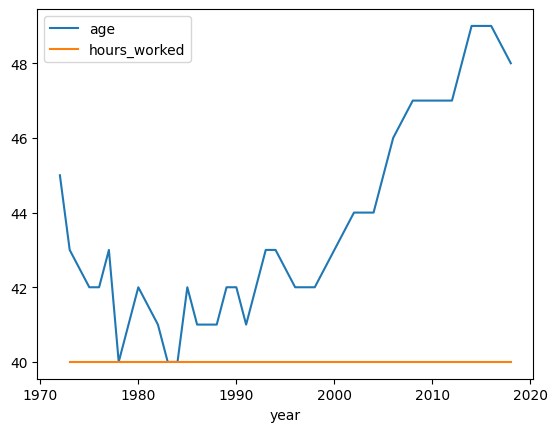

In [ ]:
(
    gss2
    .groupby('year')
    [['age','hours_worked']]
    . median()
    .plot()
)

APLICANDO FORMATO AL GRAFICO:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

<Axes: xlabel='year'>

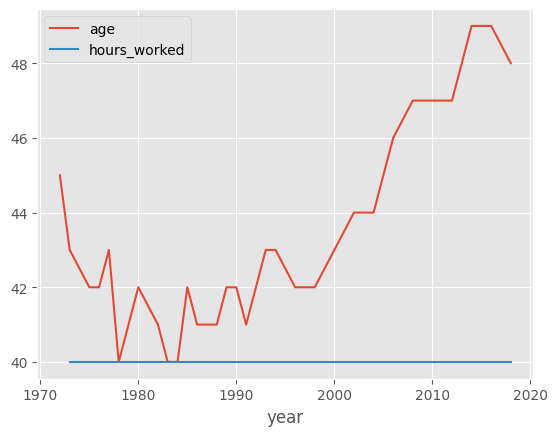

In [ ]:
(
    gss2
    .groupby('year')
    [['age','hours_worked']]
    . median()
    .plot()
)

TABLA COMO PIVOT TABLE (EXCEL)

Algo interesante puede ser hacer un groupby con 2 variables (columnas). Cambiara el index a Multiindex (Index jerarquico)

In [ ]:
(
    gss2
    .groupby(['year','sex'])
    [['age','hours_worked']]
    .mean()
)

C:\Users\User\AppData\Local\Temp\ipykernel_14832\1183120312.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','sex'])


age  hours_worked
year sex                            
1972 Female  45.987547          <NA>
     Male    43.916770          <NA>
1973 Female  43.974969     32.707792
     Male    44.417974     44.534737
1974 Female  43.676806     35.146259
...                ...           ...
2014 Male    48.779438     44.596257
2016 Female  49.818927     37.903981
     Male    48.329403     44.160354
2018 Female  48.740712     38.154712
     Male    49.255481          44.6

[64 rows x 2 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_14832\3843237337.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','sex'])


<Axes: xlabel='year,sex'>

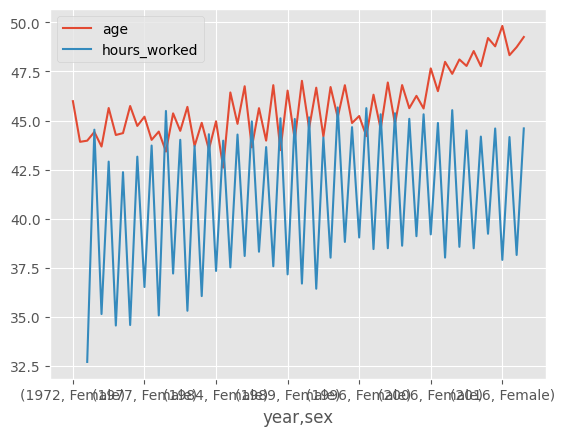

In [ ]:
(
    gss2
    .groupby(['year','sex'])
    [['age','hours_worked']]
    .mean()
    .plot()
)

In [ ]:
#Para verlo mejor usamos .unstack() PASAMOS de Indice jerarquico a Columnas Jerarquicas

(
    gss2
    .groupby(['year','sex'])
    [['age','hours_worked']]
    .mean()
    .unstack()
    #.plot()
)

C:\Users\User\AppData\Local\Temp\ipykernel_12788\4286453833.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','sex'])


age            hours_worked           
sex      Female       Male       Female       Male
year                                              
1972  45.987547  43.916770         <NA>       <NA>
1973  43.974969  44.417974    32.707792  44.534737
1974  43.676806  45.638607    35.146259  42.908277
1975  44.265031  44.359701    34.561562   42.37123
1976  45.739709  44.725637    34.586885  43.160633
1977  45.196407  44.015988    36.521851  43.727459
1978  44.438279  43.420561    35.075521  45.488323
1980  45.365526  44.475819    37.208791  44.019651
1982  45.696545  43.700258    35.313112  43.709552
1983  44.885083  43.521106    36.060465  44.303534
1984  44.964368  42.606365    37.340659  43.976247
1985  46.429251  44.830904    37.522565  44.287169
1986  46.746445  43.636511    38.102094  44.958057
1987  45.631528  43.976714    38.319569  43.649737
1988  46.802145  43.496865    37.577878  45.116331
1989  46.524628  44.013636    37.166282  45.080169
1990  47.022135  44.602649    36.697183  45.163895
1991  46.673121  44.180818    36.435374  44.133484
1993  46.707743  45.165205    38.016427   45.66736
1994  46.800825  44.874321    38.818833  44.664139
1996  45.230626  44.207782    39.044652  45.631687
1998  46.316875  44.566775    38.455216  45.319735
2000  46.936869  44.840000     38.49728  45.371524
2002  46.806156  45.629902    38.625282  45.088968
2004  46.258022  45.613636    39.110599  45.319553
2006  47.655862  46.496739    39.203402  44.876712
2008  47.989871  47.378641    38.021239  45.529781
2010  48.112076  47.779775    38.568106  44.497207
2012  48.540590  47.768362    38.494585  44.183566
2014  49.203451  48.779438    39.233732  44.596257
2016  49.818927  48.329403    37.903981  44.160354
2018  48.740712  49.255481    38.154712       44.6

C:\Users\User\AppData\Local\Temp\ipykernel_12788\754194289.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','sex'])


<Axes: xlabel='year'>

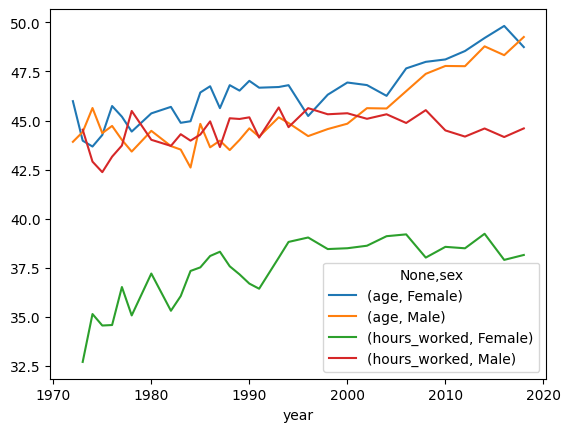

In [ ]:
#Notaremos que el gráfico nos cuenta otra historia

(
    gss2
    .groupby(['year','sex'])
    [['age','hours_worked']]
    .mean()
    .unstack()
    .plot()
)

C:\Users\User\AppData\Local\Temp\ipykernel_12788\1884447399.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','sex'])


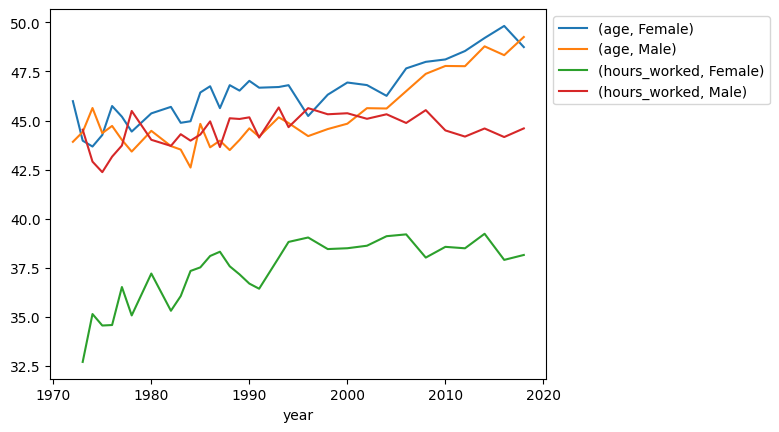

In [ ]:
#Mejorar la leyenda
(
    gss2
    .groupby(['year','sex'])
    [['age','hours_worked']]
    .mean()
    .unstack()
    .plot()
    .legend(bbox_to_anchor=(1,1))
)

In [ ]:
# Veremos que pasa por sexo y por año
(
    gss2
    .groupby(['year','sex'],observed=False)
    [['age','hours_worked']]
    .mean()
    .unstack()
    .age
)


sex,Female,Male
year,,
1972,45.987547,43.916770
1973,43.974969,44.417974
1974,43.676806,45.638607
1975,44.265031,44.359701
1976,45.739709,44.725637
1977,45.196407,44.015988
1978,44.438279,43.420561
1980,45.365526,44.475819
1982,45.696545,43.700258


<Axes: xlabel='year'>

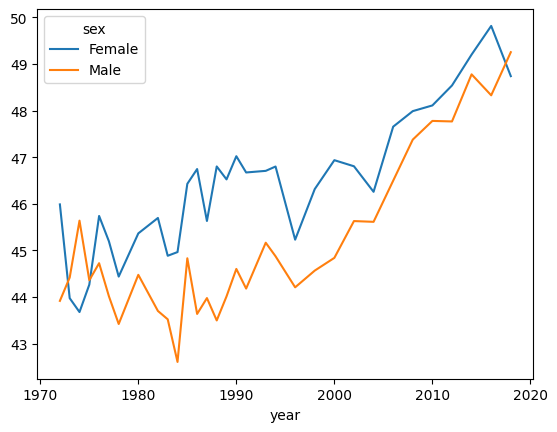

In [ ]:
# Veremos que pasa por sexo y por año en GRAFICO
(
    gss2
    .groupby(['year','sex'],observed=False)
    [['age','hours_worked']]
    .mean()
    .unstack()
    .age
    .plot()
)

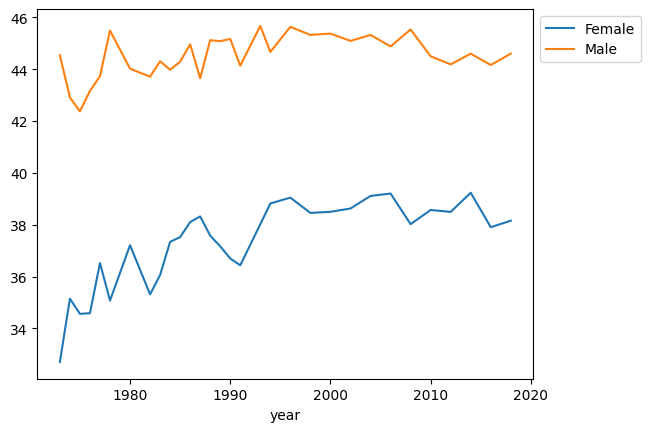

In [ ]:
#Veremos por Horas Trabajadas
(
    gss2
    .groupby(['year','sex'],observed=False)
    [['age','hours_worked']]
    .mean()
    .unstack()
    .hours_worked #Ahora por horas trabajadsas
    .plot()
    .legend(bbox_to_anchor=(1,1))
)


**Multiples Agregates**

Podemos tener multiples agregados. Pero en vez de decir mean, median,sd HACEMOS un AGG y luego passamos una lista con los agregates, pero tambien paso una funcion. Uno hace la Funcion que lo unico que hace es TOMAR un grupo y agregarlo buscando un SEGUNDO valor

In [ ]:
def second(group):
    return group.iloc[1]
(
    gss2
        .groupby(['year','sex'],observed=False)
        [['age','hours_worked']]
        .agg(['min','max','mean', second])
    
)

age                       hours_worked                        
            min max       mean second          min   max       mean second
year sex                                                                  
1972 Female  18  89  45.987547     48         <NA>  <NA>       <NA>   <NA>
     Male    18  89  43.916770     26         <NA>  <NA>       <NA>   <NA>
1973 Female  18  86  43.974969     36            1    80  32.707792     40
     Male    18  89  44.417974     32            0    89  44.534737     40
1974 Female  18  89  43.676806     69            8    89  35.146259   <NA>
...          ..  ..        ...    ...          ...   ...        ...    ...
2014 Male    18  89  48.779438     59            1    89  44.596257   <NA>
2016 Female  18  89  49.818927     55            1    89  37.903981      5
     Male    18  89  48.329403     61            1    89  44.160354     42
2018 Female  18  89  48.740712     63            1    89  38.154712     40
     Male    18  89  49.255481     42            1    89       44.6     40

[64 rows x 8 columns]

Asi hemos tenido columnas jerarquicas e indices jerarjicos
por edad tenemos min max y mean, y en la SEGUNDA entrada tenemos por HORAS TRABAJADAS tenemos minimo , maximo y la segunda entrada.

De esta manera con el uso basico del grouping and aggregation ustede puede algunas cosas poderoas y hermosas especialmente cuando se acompaña de graficos.

**Aggregation Exercise**

- Which occupation has the highest median hours worked?
- Which occupation has the lowest age?
- What is the breakdown of respondents by race for each year?
- Convert the previous to a percentage.
- How many unique occupations are there for each year?
- What is the most popular college_major for each year?
- What is the second most popular college_major for each year?

In [ ]:
#SOL1
#- Which occupation has the highest median hours worked?

(
    gss2
    .groupby(['occupation'],observed=False)
    [['hours_worked']]
    .median()
    #.unstack()
    #.hours_worked #Ahora por horas trabajadsas
    #.plot()
    #.legend(bbox_to_anchor=(1,1))
)

,hours_worked
occupation,
1,40.0
2,46.0
3,40.0
4,40.0
5,40.0
...,...
982,40.0
983,19.5
984,18.0


Q: What is the most popular college_major for each year?

S: Primero, necesitamos convertir el problema a codigo. Me dice, que por cada año yo necesito agrupar X año, y luego necesito contar la cantidad de college por cada año. Veremos si lo podemos hacer por size

In [ ]:
(gss)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37.0,36.0,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75.0,36.0,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [ ]:
#Agrupo por año, LUEGO por mayor
(
    gss
    .groupby('YEAR')
    .MAJOR1 #Hasta aqui no hace nada, añadiremos el size
    .size() #Pero no es lo que necesito....
)

YEAR
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
Name: MAJOR1, dtype: int64[pyarrow]

In [ ]:
(
    gss
    .groupby('YEAR')
    .MAJOR1 #Hasta aqui no hace nada, añadiremos el size
    .value_counts() 
)

YEAR  MAJOR1          
1972  No answer           1613
1973  No answer           1504
1974  No answer           1484
1975  No answer           1490
1976  No answer           1499
                          ... 
2018  Gerontology            1
      Humanities             1
      Public Relations       1
      Television/Film        1
      Theater arts           1
Name: count, Length: 321, dtype: int64[pyarrow]

In [ ]:
(
    gss
    .groupby('YEAR')
    .MAJOR1 #Hasta aqui no hace nada, añadiremos el size
    .value_counts()
    .unstack() #Unstack, also known as pivot, Series with MultiIndex to produce DataFrame
)

MAJOR1,Accounting/bookkeeping,Administrative Science/Public Administration,Advertising,Agriculture/horticulture,Allied health,Anthropology,Architecture,Art,Aviation/Aeronatics,Biology,...,Sociology,Special education,Statistics/Biostatistics,Television/Film,Textiles/Cloth,Theater arts,Theology,Urban and Regional Planning,Veterinary medicine,Visual Arts/Graphic Design/Design and Drafting
YEAR,,,,,,,,,,,,,,,,,,,,,
1972,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1973,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1974,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1975,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1976,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1977,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1978,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1980,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1982,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
(
    gss
    .query('MAJOR1 != "No answer"')
    .groupby(['YEAR','MAJOR1'])
    .size()
    .unstack()
    .T
    .idxmax()
)

YEAR
2012    Business administration
2014    Business administration
2016    Business administration
2018    Business administration
dtype: string[pyarrow]

idxmax() function to return the index of the maximum value across a specified axis in a DataFrame
https://www.statology.org/idxmax-pandas/

In [66]:
#Veremos otros metodos
(
    gss
    .groupby(['YEAR','MAJOR1'])
    .size()
    .unstack()
    .T
   )

YEAR,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018
MAJOR1,,,,,,,,,,,,,,,,,,,,,
Accounting/bookkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,32.0,30.0,29.0
Administrative Science/Public Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,3.0,5.0
Advertising,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN
Agriculture/horticulture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,7.0,5.0
Allied health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theater arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,1.0
Theology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,13.0,8.0
Urban and Regional Planning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,2.0


In [68]:
#Veremos otros metodos PARA NO VER LOS NAs
(
    gss
    .query('MAJOR1 != "No answer"') #Selecciono todas las celdas que no sean iguales a No answer
    .groupby(['YEAR','MAJOR1'])
    .size()
    .unstack()
    .T #De Translate para que los titulos de columnas sean indices
   )

YEAR,2012,2014,2016,2018
MAJOR1,,,,
Accounting/bookkeeping,28.0,32.0,30.0,29.0
Administrative Science/Public Administration,2.0,11.0,3.0,5.0
Advertising,3.0,2.0,NaN,NaN
Agriculture/horticulture,8.0,2.0,7.0,5.0
Allied health,NaN,2.0,1.0,NaN
...,...,...,...,...
Theater arts,6.0,2.0,3.0,1.0
Theology,6.0,6.0,13.0,8.0
Urban and Regional Planning,1.0,1.0,3.0,2.0


In [69]:
#Veremos otros metodos PARA NO VER LOS NAs
(
    gss
    .query('MAJOR1 != "No answer"')
    .groupby(['YEAR','MAJOR1'])
    .size()
    .unstack()
    .T
    .idxmax() #retorna el maximo valor del indice
   )

YEAR
2012    Business administration
2014    Business administration
2016    Business administration
2018    Business administration
dtype: string[pyarrow]

Summary
Correct types save space and enable convenient math, string, and date functionality
Chaining operations will:
Make code readable
Remove bugs
Easier to debug
Don't mutate (there's no point). Embrace chaining.
.apply is slow for math
Aggregations are powerful. Play with them until they make sense
Follow on Twitter @__mharrison__

Book giveaway!